# Imports

In [4]:
import os
os.chdir("/Users/evanrootness/Project1/EtsyDSProject")
pwd = os.getcwd()
print(pwd)

/Users/evanrootness/Project1/EtsyDSProject


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.optimize as opt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys  

In [5]:
import_data = pd.read_csv(pwd + '/data/art_map.csv')
raw_data = import_data.copy()

# Data Exploration

In [181]:
data = raw_data.drop(['web-scraper-order', 'web-scraper-start-url', 'product-href'], axis = 1)

In [11]:
print(data.shape)
data

(64, 6)


,product,name,price,reviews_product,reviews_shop,shop_star_rating
0,My Home is the Sea . giclee art print\n ...,My Home is the Sea . giclee art print,Price:\n $35.00+,107,"9,854",5 out of 5 stars
1,Giclée art print of Abstract painting signed b...,Giclée art print of Abstract painting signed b...,Price:\n $48.45+,48,"1,050",5 out of 5 stars
2,Trout Watercolor Art Print. Blue & Green Water...,Trout Watercolor Art Print. Blue & Green Water...,Price:\n $18.00+,17,"2,781",5 out of 5 stars
3,"Tree rings Print, Three Panel Wall Art, Woodcu...","Tree rings Print, Three Panel Wall Art, Woodcu...",Price:\n $209.60,240,"2,917",5 out of 5 stars
4,"Christmas pysanka Goose egg, Ukrainian Easter ...","Christmas pysanka Goose egg, Ukrainian Easter ...",Price:\n $150.00+,NaN,NaN,5 out of 5 stars
...,...,...,...,...,...,...
59,Family Portrait Illustration Custom Family Por...,Family Portrait Illustration Custom Family Por...,Price:\n $25.22+,131,650,5 out of 5 stars
60,Pet Portrait Custom Dog Portrait Personalize P...,Pet Portrait Custom Dog Portrait Personalize P...,Price:\n $7.09+,100,"2,485",5 out of 5 stars
61,"watercolor painting from photo, custom dog por...","watercolor painting from photo, custom dog por...",Price:\n $18.75+,"1,024","6,155",5 out of 5 stars
62,"Pet Painting, Watercolor Pet Portrait, Pet Mem...","Pet Painting, Watercolor Pet Portrait, Pet Mem...",Price:\n $29.95+,697,"4,852",5 out of 5 stars


In [16]:
data.describe()

,product,name,price,reviews_product,reviews_shop,shop_star_rating
count,64,64,64,61,61,64
unique,64,64,47,52,43,2
top,My Home is the Sea . giclee art print\n ...,My Home is the Sea . giclee art print,Price:\n $18.00+,71,"2,781",5 out of 5 stars
freq,1,1,8,2,7,62


In [182]:
data.rename(columns={'shop_star_rating': 'stars'}, inplace=True)

In [183]:
data.fillna(value='0', inplace=True)

In [184]:
data = data.astype(dtype='string')

In [185]:
data.dtypes

product            string[python]
name               string[python]
price              string[python]
reviews_product    string[python]
reviews_shop       string[python]
stars              string[python]
dtype: object

In [186]:
data_num = pd.DataFrame(data={'price': data['price'], 'reviews_product': data['reviews_product'], 
                              'reviews_shop': data['reviews_shop'], 'stars': data['stars']})
data_num

,price,reviews_product,reviews_shop,stars
0,Price: $35.00+,107,"9,854",5 out of 5 stars
1,Price: $48.45+,48,"1,050",5 out of 5 stars
2,Price: $18.00+,17,"2,781",5 out of 5 stars
3,Price: $209.60,240,"2,917",5 out of 5 stars
4,Price: $150.00+,0,0,5 out of 5 stars
...,...,...,...,...
59,Price: $25.22+,131,650,5 out of 5 stars
60,Price: $7.09+,100,"2,485",5 out of 5 stars
61,Price: $18.75+,"1,024","6,155",5 out of 5 stars
62,Price: $29.95+,697,"4,852",5 out of 5 stars


In [175]:
import re
name = "price: $48.00"
test = re.search('[^\$]*$', name)
print(test)
print(test.group(0))

<re.Match object; span=(8, 13), match='48.00'>
48.00


In [227]:
print(re.search('[^\s]*', data_num['stars'].astype(dtype='string')[i]).group(0))

4.5


In [239]:
price = []
reviews_product = []
reviews_shop = []
stars = []


for i in range(len(data_num['price'])):
    price.append(re.search('[^+]*', data_num['price'][i]).group(0))
    price[i] = re.search('[^\$]*$', price[i]).group(0)
    # if (data_num['reviews_product'][i].__contains__(','))
    reviews_product.append(int(data_num['reviews_product'][i].replace(',', '')))
    reviews_shop.append(int(data_num['reviews_shop'][i].replace(',', '')))
    stars.append(re.search('[^\s]*', data_num['stars'].astype(dtype='string')[i]).group(0))
    # if ()

datnum = []
all_rows = [price, reviews_product, reviews_shop, stars]
for row in all_rows:
    datnum.append(row)
data_num_int = pd.DataFrame(data={'price': datnum[0], 'reviews_product': datnum[1], 
                                  'reviews_shop': datnum[2], 'stars': datnum[3]})

In [240]:
data_num_int

,price,reviews_product,reviews_shop,stars
0,35.00,107,9854,5
1,48.45,48,1050,5
2,18.00,17,2781,5
3,209.60,240,2917,5
4,150.00,0,0,5
...,...,...,...,...
59,25.22,131,650,5
60,7.09,100,2485,5
61,18.75,1024,6155,5
62,29.95,697,4852,5


Pause

<Axes: >

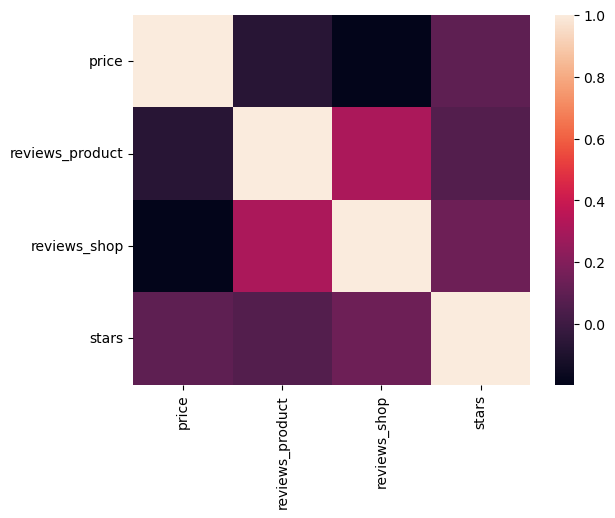

In [241]:
sns.heatmap(data_num_int.corr())

(0.0, 100.0)

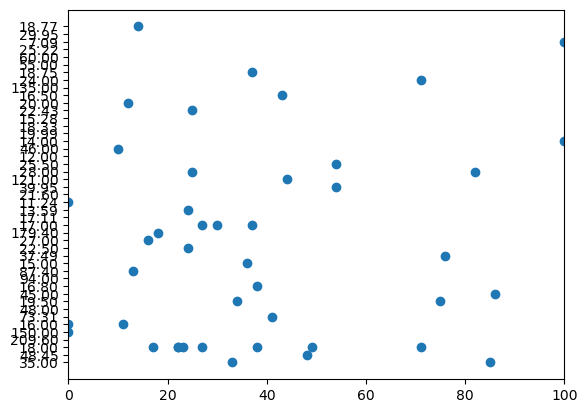

In [237]:
plt.scatter(data_num_int['reviews_product'], data_num_int['price'])
plt.xlim(0, 100)

(0.0, 5000.0)

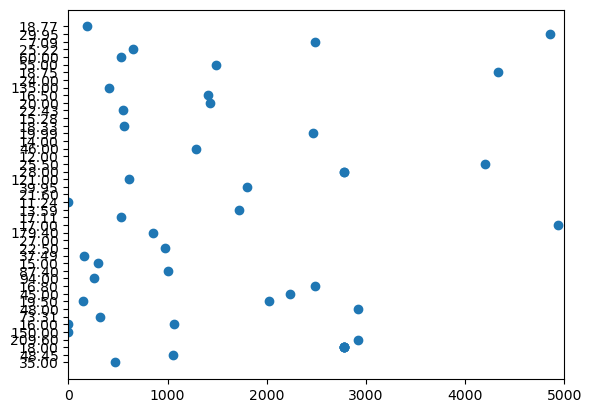

In [243]:
plt.scatter(data_num_int['reviews_shop'], data_num_int['price'])
plt.xlim(0, 5000)